In [19]:
import numpy as np # had to downgrade NumPy to resolve compatiblity issue
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [3]:
housing.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyle    

In [13]:
RE_data = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)
RE_data.shape

/var/folders/4s/xd_3ly695k1gl73bn_9m85j40000gn/T/ipykernel_90490/3216602497.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  RE_data = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)


(22213, 90)

In [14]:
RE_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 22213 entries, 520400001 to 1018100150
Data columns (total 90 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GeoRefNo      22213 non-null  int64  
 1   Tier          22213 non-null  int64  
 2   Range         22213 non-null  int64  
 3   Prop_Addr     22193 non-null  object 
 4   ZngCdPr       22107 non-null  object 
 5   ZngCdSc       26 non-null     object 
 6   ZngOLPr       1970 non-null   object 
 7   ZngOLSc       153 non-null    object 
 8   ClassPr_S     22213 non-null  object 
 9   ClassSc_S     22213 non-null  object 
 10  Legal_Pr      22213 non-null  object 
 11  SchD_S        22213 non-null  int64  
 12  TxD_S         22213 non-null  int64  
 13  MA_Ownr1      22213 non-null  object 
 14  MA_Ownr2      2876 non-null   object 
 15  MA_Line1      22199 non-null  object 
 16  MA_Line2      0 non-null      float64
 17  MA_City       22199 non-null  object 
 18  MA_State      2219

## Data Cleaning (trying to see which records need to be taken out)

### Data Cleaning - Rows

In [12]:
# check dulicated rows
housing.groupby('PID').filter(lambda x: len(x) > 1)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
817,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,...,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,...,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [38]:
# if a house had multiple transactions in the data frame, I elected to keep only the most recent sales data on any property
housing_dedupe = housing.sort_values(by=['PID', 'YrSold','MoSold'], 
                    ascending=[True, False, False]).drop_duplicates(subset='PID', keep='first')
housing_dedupe

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
224,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
323,526302030,1293,149900,20,RL,NaN,11027,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
898,526302040,1024,157500,20,RL,85.0,10533,Pave,NaN,IR1,...,280,0,NaN,NaN,NaN,0,8,2006,WD,Normal
423,526302110,882,124500,20,RL,74.0,13008,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
542,526302120,1797,169000,20,RL,NaN,11765,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,924100070,1389,170000,20,RL,77.0,10010,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
477,924151040,1803,285000,20,RL,76.0,9892,Pave,NaN,Reg,...,0,0,NaN,GdWo,NaN,0,2,2010,WD,Normal
281,924151050,2000,188000,60,RL,74.0,9627,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal
648,924152030,1797,231000,60,RL,74.0,12961,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal


In [16]:
# MSZoning: Identifies the general zoning classification of the sale.
# Only keeps MSZoning = RH, RL or RM which represents Residential zoning
housing_dedupe.MSZoning.value_counts()

MSZoning
RL         2007
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: count, dtype: int64

In [39]:
# Only keeps MSZoning = RH, RL or RM which represents Residential zoning
# Only keeps SaleCondition, meaning the Condition of sale is not Abnormal Sale -  trade, foreclosure, short sale or Sale between family members
housing_filtered_rows = housing_dedupe[
    (housing_dedupe['MSZoning'].isin(['RL', 'RM', 'RH'])) &
    (~housing_dedupe['SaleCondition'].isin(['Abnorml', 'Family']))
]
housing_filtered_rows

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
224,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
323,526302030,1293,149900,20,RL,NaN,11027,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
898,526302040,1024,157500,20,RL,85.0,10533,Pave,NaN,IR1,...,280,0,NaN,NaN,NaN,0,8,2006,WD,Normal
423,526302110,882,124500,20,RL,74.0,13008,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
542,526302120,1797,169000,20,RL,NaN,11765,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,924100060,1632,173000,60,RL,70.0,10457,Pave,NaN,IR1,...,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal
768,924100070,1389,170000,20,RL,77.0,10010,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
477,924151040,1803,285000,20,RL,76.0,9892,Pave,NaN,Reg,...,0,0,NaN,GdWo,NaN,0,2,2010,WD,Normal
281,924151050,2000,188000,60,RL,74.0,9627,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


### Data Cleaning - Columns

PoolQC          99.651163
MiscFeature     96.240310
Alley           93.488372
Fence           79.651163
MasVnrType      60.968992
FireplaceQu     48.100775
LotFrontage     17.906977
GarageCond       5.000000
GarageQual       5.000000
GarageFinish     5.000000
GarageYrBlt      5.000000
GarageType       4.922481
BsmtExposure     2.751938
BsmtFinType2     2.713178
BsmtCond         2.674419
BsmtQual         2.674419
BsmtFinType1     2.674419
MasVnrArea       0.542636
BsmtHalfBath     0.077519
BsmtFullBath     0.077519
BsmtFinSF1       0.038760
GarageCars       0.038760
GarageArea       0.038760
TotalBsmtSF      0.038760
BsmtUnfSF        0.038760
BsmtFinSF2       0.038760
Electrical       0.038760
dtype: float64


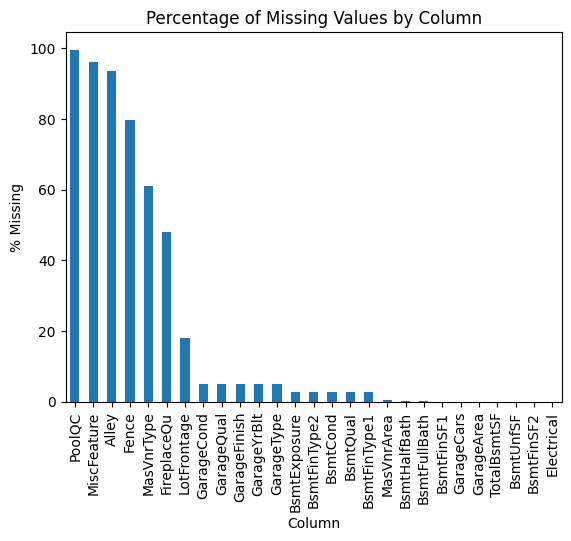

In [35]:
# Calculate % missing
missing_percent = housing.isna().mean() * 100

# Filter only columns with missing values
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)


print(missing_percent)

missing_percent.sort_values(ascending=False).plot.bar()
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% Missing')
plt.xlabel('Column')
plt.show()


# Columns with over 40% missing value (N/A) are all categorical features so we are keeping them
# To-do: for numerical features, replace NA with zero

In [4]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

### Create mapping that is used by ordinal features

In [114]:
# Instead of ordinalizing "NA" to 0, assign it to a distinct value outside the ordered range, like -1
# This makes it clearer in the feature space that "NA" is not part of the ordered scale.
# Linear models and trees will treat -1 as a separate signal.
qual_cond_map = {
    'Ex': 5,   # Excellent
    'Gd': 4,   # Good
    'TA': 3,   # Typical/Average
    'Fa': 2,   # Fair
    'Po': 1,    # Poor
    'NA': -1    # Not Applicable
}


### Lot Information

In [78]:
housing.loc[ :,['MSZoning','LotFrontage','LotArea','Street',
                'Alley','LotShape','LandContour','LotConfig',
                'LandSlope','Neighborhood','Condition1','Condition2']].isnull().sum()

MSZoning           0
LotFrontage      462
LotArea            0
Street             0
Alley           2412
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
dtype: int64

# Variable Dummification

In [ ]:
categ_nom = ['MSSubClass','BldgType','HouseStyle','SaleType','SaleCondition','MiscFeature',
             'Fence','GarageType','RoofStyle','RoofMatl','exterior_covering','MasVnrType',
             'Foundation','Utilities','Heating','CentralAir']

### Garage

In [67]:
housing.loc[ :,['GarageType','GarageYrBlt','GarageFinish','GarageCars',
                'GarageArea','GarageQual','GarageCond','PavedDrive']].isnull().sum()

GarageType      127
GarageYrBlt     129
GarageFinish    129
GarageCars        1
GarageArea        1
GarageQual      129
GarageCond      129
PavedDrive        0
dtype: int64

In [200]:
housing.loc[ :,['GarageType','GarageYrBlt','GarageFinish','GarageCars',
                'GarageArea','GarageQual','GarageCond','PavedDrive']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive
1,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y
2,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y
3,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N
4,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N
5,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y
...,...,...,...,...,...,...,...,...
759,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P
760,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y
761,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y
762,Attchd,2000.0,Fin,2.0,486.0,TA,TA,Y


In [227]:
# check missingness for GarageType
# all houses missing GarageType have zero GarageCars / GarageArea
# houses missing FireplaceQu is because they don't have fireplaces
#housing[housing['GarageType'].isnull()][['GarageArea']].value_counts()
housing[housing['GarageCars'].isnull()][['GarageType']].value_counts()

GarageType
Detchd        1
Name: count, dtype: int64

In [218]:
housing[(housing['GarageYrBlt'].isnull()) & (housing['GarageType'] == 'Detchd')]['PID']

Series([], Name: PID, dtype: int64)

In [216]:
# fill values for nulls
housing['GarageType'] = housing['GarageType'].fillna('NA')
#housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(-1) # use -1 to represent NA, this treatment is consistent throughout this notebook

# use YearBuilt as an estimate for 2 houses that do have garages but have null GarageYrBlt
housing['GarageYrBlt'] = np.where(
    housing['GarageYrBlt'].notnull(),
    housing['GarageYrBlt'],
    np.where(
        housing['GarageType'] == 'NA',
        -1,                              
        housing['YearBuilt']                              
    )
)


In [223]:
# to check if above formula works
housing[(housing['GarageFinish'].isnull()) & (housing['GarageType'] == 'Detchd')]#[['GarageYrBlt','YearBuilt']]

#housing.GarageYrBlt.value_counts()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ExterQual_ordinal,ExterCond_ordinal,BsmtQual_ordinal,BsmtCond_ordinal,BsmtExposure_ordinal,BsmtFinType1_ordinal,BsmtFinType2_ordinal,KitchenQual_ordinal,Functional_ordinal,PoolQC_ordinal
434,910201180,1828,150909,70,RM,50.0,9060,Pave,NaN,Reg,...,3,3,4,3,1,5,1,4,8,-1
532,903426160,1984,160000,60,RM,57.0,8094,Pave,Grvl,Reg,...,3,3,3,3,2,3,1,3,8,-1


In [ ]:
housing[(housing['GarageYrBlt'].isnull()) & (housing['GarageType'] == 'Detchd')]['PID']

In [224]:
# estimate 

housing[(housing['GarageFinish'].isnull()) & (housing['GarageType'] == 'Detchd')].groupby(['Neighborhood', 'GarageType'])['GarageFinish'].value_counts(normalize=True)


Series([], Name: proportion, dtype: float64)

In [226]:
housing[~housing['GarageFinish'].isnull()].groupby(['Neighborhood', 'GarageType'])['GarageFinish'].value_counts(normalize=True)

Neighborhood  GarageType  GarageFinish
Blmngtn       Attchd      Fin             0.913043
                          RFn             0.086957
Blueste       Attchd      Fin             0.714286
                          Unf             0.285714
              Detchd      Unf             1.000000
                                            ...   
Timber        BuiltIn     Fin             1.000000
              Detchd      Unf             1.000000
Veenker       Attchd      RFn             0.565217
                          Fin             0.304348
                          Unf             0.130435
Name: proportion, Length: 178, dtype: float64

### Amenities

In [69]:
housing.loc[ :,['Fireplaces','FireplaceQu','WoodDeckSF','OpenPorchSF',
                'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                'PoolQC','Fence','MiscFeature','MiscVal']].isnull().sum()

Fireplaces          0
FireplaceQu      1241
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           2571
Fence            2055
MiscFeature      2483
MiscVal             0
dtype: int64

In [194]:
housing.loc[ :,['WoodDeckSF','OpenPorchSF',
                'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                'PoolQC','Fence','MiscFeature','MiscVal']]

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal
1,0,0,0,0,166,0,NaN,NaN,NaN,0
2,0,105,0,0,0,0,NaN,NaN,NaN,0
3,154,0,42,86,0,0,NaN,NaN,NaN,0
4,0,0,168,0,111,0,NaN,NaN,NaN,0
5,0,45,0,0,0,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
759,0,98,0,0,40,0,NaN,NaN,NaN,0
760,0,0,0,0,0,0,NaN,NaN,NaN,0
761,0,0,0,0,0,0,NaN,NaN,NaN,0
762,193,96,0,0,0,0,NaN,NaN,NaN,0


In [192]:
# check missingness for FireplaceQu
# houses missing FireplaceQu is because they don't have fireplaces
housing[housing['FireplaceQu'].isnull()][['Fireplaces']].value_counts()

Fireplaces
0             1241
Name: count, dtype: int64

In [195]:
# fill values for nulls
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('NA')

housing['PoolQC'] = housing['PoolQC'].fillna('NA')
housing['Fence'] = housing['Fence'].fillna('NA')
housing['MiscFeature'] = housing['MiscFeature'].fillna('NA')

In [196]:
# ordinalize PoolQC
housing['PoolQC_ordinal'] = housing['PoolQC'].map(qual_cond_map)

In [199]:
# drop PoolQC
housing.drop(columns=['PoolQC'], inplace=True)

### Sale Information

In [70]:
housing.loc[ :,['SalePrice','MoSold','YrSold',
               'SaleType','SaleCondition']].isnull().sum()

SalePrice        0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [189]:
housing.loc[ :,['SalePrice','MoSold','YrSold',
               'SaleType','SaleCondition']]

,SalePrice,MoSold,YrSold,SaleType,SaleCondition
1,126000,3,2010,WD,Normal
2,139500,2,2009,WD,Normal
3,124900,11,2007,WD,Normal
4,114000,5,2009,WD,Normal
5,227000,11,2009,WD,Normal
...,...,...,...,...,...
759,121000,5,2009,WD,Normal
760,139600,6,2009,WD,Normal
761,145000,8,2007,WD,Normal
762,217500,7,2007,WD,Normal


In [191]:
housing.SaleCondition.value_counts()

SaleCondition
Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: count, dtype: int64

### House General Information

In [71]:
housing.loc[ :,['PID','GrLivArea','1stFlrSF',
               '2ndFlrSF','LowQualFinSF','BedroomAbvGr','TotRmsAbvGrd',
               'Functional']].isnull().sum()

PID             0
GrLivArea       0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
BedroomAbvGr    0
TotRmsAbvGrd    0
Functional      0
dtype: int64

In [179]:
housing.loc[ :,['PID','GrLivArea','1stFlrSF',
               '2ndFlrSF','LowQualFinSF','BedroomAbvGr','TotRmsAbvGrd',
               'Functional']]

,PID,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,TotRmsAbvGrd,Functional
1,909176150,856,856,0,0,2,4,Typ
2,905476230,1049,1049,0,0,2,5,Typ
3,911128020,1001,1001,0,0,2,5,Typ
4,535377150,1039,717,322,0,2,6,Typ
5,534177230,1665,810,855,0,3,6,Typ
...,...,...,...,...,...,...,...,...
759,903205040,952,952,0,0,2,4,Typ
760,905402060,1733,1733,0,0,4,8,Min2
761,909275030,2002,1001,1001,0,4,8,Typ
762,907192040,1842,985,857,0,3,7,Typ


In [185]:
# ordinalize Functional column
functionality_map = {
        "Typ": 8, # Typical Functionality
        "Min1": 7, # Minor Deductions 1
        "Min2": 6, # Minor Deductions 2
        "Mod": 5, # Moderate Deductions
        "Maj1": 4, # Major Deductions 1
        "Maj2": 3, # Major Deductions 2
        "Sev": 2, # Severely Damaged
        "Sal": 1, # Salvage only
}

housing['Functional_ordinal'] = housing['Functional'].map(functionality_map)

In [188]:
# drop Functional column
housing.drop(columns=['Functional'], inplace=True)

### GrLivArea = 1stFlrSF + 2ndFlrSF + LowQualFinSF

In [180]:
# check multicollinearity among 1stFlrSF, 2ndFlrSF, LowQualFinSF and GrLivArea
# need to remove GrLivArea in regression models
check = np.isclose(
    housing['1stFlrSF'] + housing['2ndFlrSF'] + housing['LowQualFinSF'],
    housing['GrLivArea']
)
check

array([ True,  True,  True, ...,  True,  True,  True])

In [181]:
check.sum()

2580

In [72]:
housing.loc[ :,['MSSubClass','BldgType','HouseStyle','OverallQual',
                'OverallCond','YearBuilt','YearRemodAdd']].isnull().sum()

MSSubClass      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [174]:
housing.loc[ :,['MSSubClass','BldgType','HouseStyle','OverallQual',
                'OverallCond','YearBuilt','YearRemodAdd']]

,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd
1,30,1Fam,1Story,6,6,1939,1950
2,120,TwnhsE,1Story,5,5,1984,1984
3,30,1Fam,1Story,5,9,1930,2007
4,70,1Fam,2Story,4,8,1900,2003
5,60,1Fam,2Story,8,6,2001,2001
...,...,...,...,...,...,...,...
759,30,1Fam,1.5Unf,6,6,1916,1950
760,20,1Fam,1Story,3,5,1955,1955
761,90,Duplex,2Story,5,6,1949,1950
762,60,1Fam,2Story,7,5,2000,2000


In [177]:
# below columns are ordinal features already
print(housing['OverallQual'].dtype)
print(housing['OverallCond'].dtype)

int64
int64


In [178]:
print(housing['YearBuilt'].dtype)
print(housing['YearRemodAdd'].dtype)

int64
int64


### Kitchen

In [74]:
housing.loc[ :,['KitchenAbvGr','KitchenQual']].isnull().sum()

KitchenAbvGr    0
KitchenQual     0
dtype: int64

In [161]:
# ordinalize 'KitchenQual'
housing['KitchenQual_ordinal'] = housing['KitchenQual'].map(qual_cond_map)

In [163]:
# drop column that has been ordinalized
housing.drop(columns=['KitchenQual'], inplace=True)

### Basement

In [75]:
housing.loc[ :,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
                'TotalBsmtSF']].isnull().sum()

BsmtQual        69
BsmtCond        69
BsmtExposure    71
BsmtFinType1    69
BsmtFinSF1       1
BsmtFinType2    70
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
dtype: int64

In [119]:
# fill values for nulls
housing['BsmtQual'] = housing['BsmtQual'].fillna('NA')
housing['BsmtCond'] = housing['BsmtCond'].fillna('NA')

In [120]:
# ordinalize 'BsmtQual','BsmtCond'
housing['BsmtQual_ordinal'] = housing['BsmtQual'].map(qual_cond_map)
housing['BsmtCond_ordinal'] = housing['BsmtCond'].map(qual_cond_map)

In [123]:
# drop column that has been ordinalized
housing.drop(columns=['BsmtQual','BsmtCond'], inplace=True)

In [127]:
# check missingness in BsmtExposure
# among 71 missing values, 69 houses have no basement while 2 houses have no basement exposure
housing[housing['BsmtExposure'].isnull()][['BsmtQual_ordinal']].value_counts()

BsmtQual_ordinal
-1                  69
 4                   2
Name: count, dtype: int64

In [129]:
# fill in the missing value for BsmtExposure
housing['BsmtExposure'] = np.where(
    housing['BsmtExposure'].notnull(),
    housing['BsmtExposure'],
    np.where(
        housing['BsmtQual_ordinal'] == -1,
        'NA',                              
        'No'                              
    )
)

In [131]:
# ordinalize BsmtExposure field
bsmt_exp_map = {
    'Gd': 4,   # Good Exposure
    'Av': 3,   # Average Exposure (split levels or foyers typically score average or above)
    'Mn': 2,   # Mimimum Exposure
    'No': 1,   # No Exposure
    'NA': -1   # No Basement
}

housing['BsmtExposure_ordinal'] = housing['BsmtExposure'].map(bsmt_exp_map)

In [134]:
housing.drop(columns=['BsmtExposure'], inplace=True)

In [135]:
# check how many houses with BsmtFinType1 != BsmtFinType2
# 1,873 in total so combining the two fields is probably not an easy task so I chose to ordinalize these two fields instead
housing[housing['BsmtFinType1'] != housing['BsmtFinType2']]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,YrSold,SaleType,SaleCondition,HeatingQC_ordinal,exterior_covering,ExterQual_ordinal,ExterCond_ordinal,BsmtQual_ordinal,BsmtCond_ordinal,BsmtExposure_ordinal
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,2010,WD,Normal,3,Wd Sdng,3,3,3,3,1
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,2009,WD,Normal,3,HdBoard,4,3,4,3,2
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,2007,WD,Normal,5,MetalSd,4,3,3,3,1
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,2009,WD,Normal,5,VinylSd,4,3,4,3,1
6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,...,2009,ConLD,Normal,5,HdBoard,4,3,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,534430050,816,129800,30,RL,60.0,8550,Pave,NaN,Reg,...,2006,WD,Normal,5,MetalSd,3,3,3,3,1
760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,...,2009,WD,Normal,5,BrkFace_Wd Sdng,3,3,-1,-1,-1
761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,...,2007,WD,Normal,3,MetalSd,3,3,3,3,1
762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,...,2007,WD,Normal,5,VinylSd,4,3,4,3,1


In [136]:
# check missingness in BsmtFinType1
# it turns out these houses have no basement 
housing[housing['BsmtFinType1'].isnull()][['BsmtQual_ordinal']].value_counts()

BsmtQual_ordinal
-1                  69
Name: count, dtype: int64

In [138]:
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('NA')

In [137]:
# check missingness in BsmtFinType2
# it turns out 69 houses have no basement and 1 house have basement area
housing[housing['BsmtFinType2'].isnull()][['BsmtQual_ordinal']].value_counts()

BsmtQual_ordinal
-1                  69
 4                   1
Name: count, dtype: int64

In [140]:
# fill in the missing value for BsmtFinType2
housing['BsmtFinType2'] = np.where(
    housing['BsmtFinType2'].notnull(),
    housing['BsmtFinType2'],
    np.where(
        housing['BsmtQual_ordinal'] == -1,
        'NA',                              
        'GLQ'                              
    )
)

In [142]:
# ordinalize BsmtFinType1 and BsmtFinType2 field
bsmt_fin_type_map = {
    'GLQ': 6,   # Good Living Quarters
    'ALQ': 5,   # Average Living Quarters
    'BLQ': 4,   # Below Average Living Quarters
    'Rec': 3,   # Average Rec Room
    'LwQ': 2,   # Low Quality
    'Unf': 1,   # Unfinshed
    'NA': -1    # No Basement
}

housing['BsmtFinType1_ordinal'] = housing['BsmtFinType1'].map(bsmt_fin_type_map)
housing['BsmtFinType2_ordinal'] = housing['BsmtFinType2'].map(bsmt_fin_type_map)

In [147]:
housing.drop(columns=['BsmtFinType1','BsmtFinType2'], inplace=True)

In [154]:
# check missingness for below features
# this house has no basement
#housing[housing['BsmtFinSF1'].isnull()][['BsmtQual_ordinal']].value_counts()
#housing[housing['BsmtFinSF2'].isnull()][['BsmtQual_ordinal']].value_counts()
#housing[housing['BsmtUnfSF'].isnull()][['BsmtQual_ordinal']].value_counts()
housing[housing['TotalBsmtSF'].isnull()][['BsmtQual_ordinal']].value_counts()

BsmtQual_ordinal
-1                  1
Name: count, dtype: int64

In [155]:
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinSF2'] = housing['BsmtFinSF2'].fillna(0)
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0)
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)

### TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF

In [157]:
# check multicollinearity among BsmtFinSF1, BsmtFinSF2, BsmtUnfSF and TotalBsmtSF
# need to remove TotalBsmtSF in regression models
check = np.isclose(
    housing['BsmtFinSF1'] + housing['BsmtFinSF2'] + housing['BsmtUnfSF'],
    housing['TotalBsmtSF']
)
check

array([ True,  True,  True, ...,  True,  True,  True])

In [158]:
check.sum()             # Number of matching rows matches the number of records we have
#len(housing) - check.sum()  # Number of mismatched rows


2580

### Bathroom

In [73]:
housing.loc[ :,['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].isnull().sum()

BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
dtype: int64

In [171]:
# check missingness of BsmtFullBath and BsmtHalfBath
# value is missing due to house do not have basement
housing[housing['BsmtFullBath'].isnull()][['BsmtQual_ordinal']].value_counts()
housing[housing['BsmtHalfBath'].isnull()][['BsmtQual_ordinal']].value_counts()

BsmtQual_ordinal
-1                  2
Name: count, dtype: int64

In [172]:
# fill missing value with zero
housing['BsmtFullBath'] = housing['BsmtFullBath'].fillna(0)
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].fillna(0)

### House External Features

In [111]:
housing.loc[ :,['RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                'MasVnrType','MasVnrArea','ExterQual','ExterCond',
                'Foundation']].isnull().sum()

KeyError: "['Exterior1st', 'Exterior2nd'] not in index"

In [107]:
housing['exterior_covering'] = np.where(
    housing['Exterior1st'] == housing['Exterior2nd'],
    housing['Exterior1st'],
    housing['Exterior1st'] + '_' + housing['Exterior2nd']
)

# double check before dropping the original columns
# housing.loc[:, ['Exterior1st','Exterior2nd','exterior_covering']]

In [109]:
housing.drop(columns=['Exterior1st','Exterior2nd'], inplace=True)

In [110]:
# fill values for nulls
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

In [112]:
# double check
housing.loc[ :,['RoofStyle','RoofMatl','exterior_covering',
                'MasVnrType','MasVnrArea','ExterQual','ExterCond',
                'Foundation']].isnull().sum()

RoofStyle            0
RoofMatl             0
exterior_covering    0
MasVnrType           0
MasVnrArea           0
ExterQual            0
ExterCond            0
Foundation           0
dtype: int64

In [115]:
# ordinalize 'ExterQual','ExterCond'
housing['ExterQual_ordinal'] = housing['ExterQual'].map(qual_cond_map)
housing['ExterCond_ordinal'] = housing['ExterCond'].map(qual_cond_map)

In [118]:
# drop column that has been ordinalized
housing.drop(columns=['ExterQual','ExterCond'], inplace=True)

### Utilities

In [101]:
housing.loc[ :,['Utilities','Heating','HeatingQC','CentralAir','Electrical']].isnull().sum()

Utilities     0
Heating       0
HeatingQC     0
CentralAir    0
Electrical    0
dtype: int64

In [80]:
# ordinalize heating quality ratings
# Define the ordinal mapping
# heatingqc_map = {
#     'Ex': 5,   # Excellent
#     'Gd': 4,   # Good
#     'TA': 3,   # Typical/Average
#     'Fa': 2,   # Fair
#     'Po': 1    # Poor
# }

# Apply the mapping
housing['HeatingQC_ordinal'] = housing['HeatingQC'].map(qual_cond_map)
housing['HeatingQC_ordinal'].value_counts()

HeatingQC_ordinal
5    1293
3     768
4     434
2      84
1       1
Name: count, dtype: int64

In [102]:
# drop column that has been ordinalized
housing.drop(columns=['HeatingQC'], inplace=True)

In [89]:
# 1 house with missing Electrical value is built in 2006, 1 Fam Bldg Type and SLvl House stype
housing[housing['Electrical'].isnull()][['YearBuilt','BldgType','HouseStyle']]

,YearBuilt,BldgType,HouseStyle
626,2006,1Fam,SLvl


In [99]:
# I used the Electrical from another house that was built in the same year and with same housing / blvd style 
housing.loc[
    (housing['YearBuilt'] == 2006) & (housing['BldgType'] == '1Fam') & (housing['HouseStyle'] == 'SLvl')][['Electrical']]

,Electrical
626,NaN
628,SBrkr


In [100]:
housing['Electrical'] = housing['Electrical'].fillna('SBrkr')


In [ ]:
# double check
housing.loc[ :,['Utilities','Heating','HeatingQC','CentralAir','Electrical']].isnull().sum()

- Nominal Variables (Categorical, No Order)
- Ordinal Variables (Categorical, With Order)
- Discrete Variables (Quantitative, Countable)
- Continuous Variables (Quantitative, Measurable)

## Feature Engineering
1. Assign quarter to 'MoSold' to assist seasonality analysis
2. Calculate age of the house when sold defined as year sold minus year remodeled
3. Create a column that is the combo of field 'BldgType' and 'HouseStyle' (type of dwelling and style of dwelling)
4. Unit price (unit price by type and stype of swelling or foundation type)

In [37]:
housing.loc[ :,['YearBuilt','YearRemodAdd','MoSold','YrSold']]

,YearBuilt,YearRemodAdd,MoSold,YrSold
1,1939,1950,3,2010
2,1984,1984,2,2009
3,1930,2007,11,2007
4,1900,2003,5,2009
5,2001,2001,11,2009
...,...,...,...,...
759,1916,1950,5,2009
760,1955,1955,6,2009
761,1949,1950,8,2007
762,2000,2000,7,2007


In [41]:
housing.loc[ :,['PID','BldgType','HouseStyle']]

,PID,BldgType,HouseStyle
1,909176150,1Fam,1Story
2,905476230,TwnhsE,1Story
3,911128020,1Fam,1Story
4,535377150,1Fam,2Story
5,534177230,1Fam,2Story
...,...,...,...
759,903205040,1Fam,1.5Unf
760,905402060,1Fam,1Story
761,909275030,Duplex,2Story
762,907192040,1Fam,2Story


In [42]:
housing.loc[ :,['Condition1','Condition2']]

,Condition1,Condition2
1,Norm,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm
5,Norm,Norm
...,...,...
759,Norm,Norm
760,Norm,Norm
761,Norm,Norm
762,Norm,Norm


In [36]:
housing.loc[ :,['GrLivArea','1stFlrSF','2ndFlrSF','TotalBsmtSF']]

,GrLivArea,1stFlrSF,2ndFlrSF,TotalBsmtSF
1,856,856,0,856.0
2,1049,1049,0,1049.0
3,1001,1001,0,837.0
4,1039,717,322,405.0
5,1665,810,855,810.0
...,...,...,...,...
759,952,952,0,952.0
760,1733,1733,0,0.0
761,2002,1001,1001,1001.0
762,1842,985,857,985.0


In [15]:
housing[housing['GrLivArea'] != housing['1stFlrSF'] + housing['2ndFlrSF']].loc[ :,['GrLivArea','1stFlrSF','2ndFlrSF']]

,GrLivArea,1stFlrSF,2ndFlrSF
171,2377,1313,0
182,935,779,0
206,1484,866,504
212,1200,520,600
220,1522,1008,0
340,1382,854,0
470,2358,938,1215
475,1656,808,704
676,1531,1169,0
767,1480,1044,0
